# <center>Data exploration and enrichment for supervised classification</center>
### Project Team Members
Joana Pinto, nº 202206183  
Matheus, nº  202200431  
Robert Gleison dos Reis Pereira, nº 202200496

# Objective

<div style="text-align: justify">
This practical assignment consist in the development of a full data science pipeline, from exploratory data analysis and data preprocessing to the application of supervised learning techniques for classification and their respective performance evaluation.
</div>

# Subject:
### The Hepatocellular Carcinoma Dataset

<div style="text-align: justify">
In this project, the goal is to address a real data science use case from data cleaning and feature assessment to
visual inspection and communication of results, using the Hepatocellular Carcinoma (HCC) dataset. The HCC
dataset was collected at the Coimbra Hospital and University Center (CHUC) in Portugal and contains real
clinical data of patients diagnosed with HCC. The main goal of this project is to develop a machine learning
pipeline capable of determining the survivability of patients at 1 year after diagnosis (e.g., "lives" or "dies").
</div>

In [423]:
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, learning_curve, GridSearchCV, KFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, accuracy_score, roc_auc_score, auc
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import warnings

warnings.filterwarnings("ignore")
pd.set_option('display.max_columns', None) 

# 1. Data Exploration

<div style="text-align: justify">
During this phase, the primary focus is on extracting information about the dataset, understanding its perceptual characteristics, exploring data correlations, assessing the importance of each feature, and gaining a comprehensive understanding of the dataset as a whole.
</div>

### 1.1 Data Cleaning

<div style="text-align: justify">
The dataset contains numerous missing values denoted by '?' entries. To enhance data handling, we plan to replace these '?' with NaN (Not a Number). However, before proceeding with this replacement, we repalce the values assigned as None in features 'Encephalopathy' and 'Ascites' with 'No'. This precaution ensures that None values are not misconstrued as NaN during subsequent data processing.
</div>


In [424]:
df = pd.read_csv('hcc_dataset.csv')
df.head(10)

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,Diabetes,Obesity,Hemochro,AHT,CRI,HIV,NASH,Varices,Spleno,PHT,PVT,Metastasis,Hallmark,Age,Grams_day,Packs_year,PS,Encephalopathy,Ascites,INR,AFP,Hemoglobin,MCV,Leucocytes,Platelets,Albumin,Total_Bil,ALT,AST,GGT,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,Male,No,Yes,No,No,No,No,Yes,No,Yes,Yes,?,Yes,No,No,No,No,Yes,No,No,No,No,Yes,67,137,15,Active,NaN,NaN,1.53,95,13.7,106.6,4.9,99,3.4,2.1,34,41,183,150,7.1,0.7,1,3.5,0.5,?,?,?,Lives
1,Female,?,No,No,No,No,Yes,Yes,?,?,Yes,No,No,Yes,No,No,No,Yes,No,No,No,No,Yes,62,0,?,Active,NaN,NaN,?,?,?,?,?,?,?,?,?,?,?,?,?,?,1,1.8,?,?,?,?,Lives
2,Male,No,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,No,Yes,Yes,No,No,No,No,Yes,No,Yes,Yes,78,50,50,Ambulatory,NaN,Mild,0.96,5.8,8.9,79.8,8.4,472,3.3,0.4,58,68,202,109,7,2.1,5,13,0.1,28,6,16,Lives
3,Male,Yes,Yes,No,No,No,No,Yes,No,Yes,Yes,No,No,Yes,No,No,No,No,No,No,No,Yes,Yes,77,40,30,Active,NaN,NaN,0.95,2440,13.4,97.1,9,279,3.7,0.4,16,64,94,174,8.1,1.11,2,15.7,0.2,?,?,?,Dies
4,Male,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,No,Yes,Yes,No,No,No,No,No,No,No,Yes,76,100,30,Active,NaN,NaN,0.94,49,14.3,95.1,6.4,199,4.1,0.7,147,306,173,109,6.9,1.8,1,9,?,59,15,22,Lives
5,Male,No,Yes,No,?,No,No,Yes,No,?,No,Yes,No,No,No,No,No,Yes,Yes,Yes,No,No,Yes,75,?,?,Restricted,NaN,Mild,1.58,110,13.4,91.5,5.4,85,3.4,3.5,91,122,242,396,5.6,0.9,1,10,1.4,53,22,111,Dies
6,Male,No,No,No,?,Yes,Yes,Yes,No,No,Yes,No,?,No,No,No,No,No,No,No,No,No,Yes,49,0,0,Active,NaN,NaN,1.4,138.9,10.4,102,3.2,42000,2.35,2.72,119,183,143,211,7.3,0.8,5,2.6,2.19,171,126,1452,Dies
7,Male,Yes,Yes,No,?,No,No,Yes,No,Yes,Yes,?,No,No,No,No,No,No,Yes,Yes,Yes,No,Yes,61,?,20,Selfcare,NaN,NaN,1.46,9860,10.8,92,3,58,3.1,3.2,79,108,184,300,7.1,0.52,2,9,1.3,42,25,706,Dies
8,Male,Yes,Yes,No,No,No,No,Yes,No,Yes,Yes,No,No,Yes,No,No,No,?,Yes,Yes,No,No,Yes,50,100,32,Restricted,NaN,Mild,3.14,8.8,11.9,107.5,4.9,70,1.9,3.3,26,59,115,63,6.1,0.59,1,6.4,1.2,85,73,982,Lives
9,Male,Yes,Yes,No,No,No,No,Yes,No,No,No,No,Yes,No,No,No,No,No,Yes,No,No,No,No,43,100,0,Active,NaN,NaN,1.12,1.8,11.8,87.8,5100,193000,4.2,0.5,71,45,256,303,7.1,0.59,1,9.3,0.7,?,?,?,Lives


Sum of missing values for each column

<div style="text-align: justify">
Examining the proportion of missing values in the dataset is also crucial. For example, columns such as 'Ferritin', 'Sat', and 'Iron' exhibit approximately 50% missing values. In such cases, if these columns demonstrate weak correlations with the target class, they become strong candidates for removal from the dataset. 
</div> 

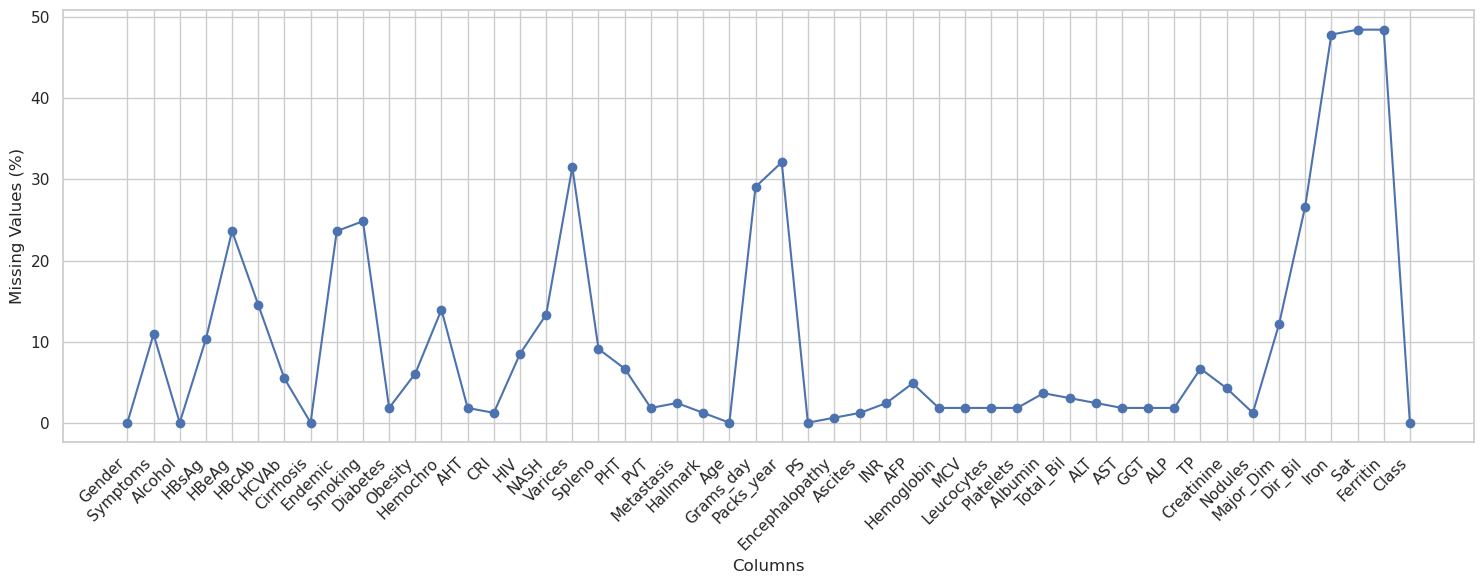

In [425]:
# print("Missing values of each column:\n")
missing_percentages = []
for column in df.columns:
    missing_percentage = ((df[column] == '?').sum() / df[column].shape[0]) * 100
    # print(f"{column}: {missing_percentage:.2f}%  ({df[column].isnull().sum()})")
    missing_percentages.append(missing_percentage)

plt.figure(figsize=(15, 6))
plt.plot(df.columns, missing_percentages, marker='o', linestyle='-')
plt.xlabel('Columns')
plt.ylabel('Missing Values (%)')
plt.xticks(rotation=45, ha='right') 
plt.grid(True)
plt.tight_layout()
plt.show()

In [426]:
(df == '?').sum()

Gender             0
Symptoms          18
Alcohol            0
HBsAg             17
HBeAg             39
HBcAb             24
HCVAb              9
Cirrhosis          0
Endemic           39
Smoking           41
Diabetes           3
Obesity           10
Hemochro          23
AHT                3
CRI                2
HIV               14
NASH              22
Varices           52
Spleno            15
PHT               11
PVT                3
Metastasis         4
Hallmark           2
Age                0
Grams_day         48
Packs_year        53
PS                 0
Encephalopathy     1
Ascites            2
INR                4
AFP                8
Hemoglobin         3
MCV                3
Leucocytes         3
Platelets          3
 Albumin           6
Total_Bil          5
ALT                4
AST                3
GGT                3
ALP                3
TP                11
Creatinine         7
Nodules            2
Major_Dim         20
Dir_Bil           44
Iron              79
Sat          

In [427]:
df.replace('?', np.nan, inplace=True)
df[['Encephalopathy', 'Ascites']] = df[['Encephalopathy', 'Ascites']].fillna('No')
df.head(10)

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,Diabetes,Obesity,Hemochro,AHT,CRI,HIV,NASH,Varices,Spleno,PHT,PVT,Metastasis,Hallmark,Age,Grams_day,Packs_year,PS,Encephalopathy,Ascites,INR,AFP,Hemoglobin,MCV,Leucocytes,Platelets,Albumin,Total_Bil,ALT,AST,GGT,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,Male,No,Yes,No,No,No,No,Yes,No,Yes,Yes,NaN,Yes,No,No,No,No,Yes,No,No,No,No,Yes,67,137,15,Active,No,No,1.53,95,13.7,106.6,4.9,99,3.4,2.1,34,41,183,150,7.1,0.7,1,3.5,0.5,NaN,NaN,NaN,Lives
1,Female,NaN,No,No,No,No,Yes,Yes,NaN,NaN,Yes,No,No,Yes,No,No,No,Yes,No,No,No,No,Yes,62,0,NaN,Active,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,1.8,NaN,NaN,NaN,NaN,Lives
2,Male,No,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,No,Yes,Yes,No,No,No,No,Yes,No,Yes,Yes,78,50,50,Ambulatory,No,Mild,0.96,5.8,8.9,79.8,8.4,472,3.3,0.4,58,68,202,109,7,2.1,5,13,0.1,28,6,16,Lives
3,Male,Yes,Yes,No,No,No,No,Yes,No,Yes,Yes,No,No,Yes,No,No,No,No,No,No,No,Yes,Yes,77,40,30,Active,No,No,0.95,2440,13.4,97.1,9,279,3.7,0.4,16,64,94,174,8.1,1.11,2,15.7,0.2,NaN,NaN,NaN,Dies
4,Male,Yes,Yes,Yes,No,Yes,No,Yes,No,Yes,No,No,No,Yes,Yes,No,No,No,No,No,No,No,Yes,76,100,30,Active,No,No,0.94,49,14.3,95.1,6.4,199,4.1,0.7,147,306,173,109,6.9,1.8,1,9,NaN,59,15,22,Lives
5,Male,No,Yes,No,NaN,No,No,Yes,No,NaN,No,Yes,No,No,No,No,No,Yes,Yes,Yes,No,No,Yes,75,NaN,NaN,Restricted,No,Mild,1.58,110,13.4,91.5,5.4,85,3.4,3.5,91,122,242,396,5.6,0.9,1,10,1.4,53,22,111,Dies
6,Male,No,No,No,NaN,Yes,Yes,Yes,No,No,Yes,No,NaN,No,No,No,No,No,No,No,No,No,Yes,49,0,0,Active,No,No,1.4,138.9,10.4,102,3.2,42000,2.35,2.72,119,183,143,211,7.3,0.8,5,2.6,2.19,171,126,1452,Dies
7,Male,Yes,Yes,No,NaN,No,No,Yes,No,Yes,Yes,NaN,No,No,No,No,No,No,Yes,Yes,Yes,No,Yes,61,NaN,20,Selfcare,No,No,1.46,9860,10.8,92,3,58,3.1,3.2,79,108,184,300,7.1,0.52,2,9,1.3,42,25,706,Dies
8,Male,Yes,Yes,No,No,No,No,Yes,No,Yes,Yes,No,No,Yes,No,No,No,NaN,Yes,Yes,No,No,Yes,50,100,32,Restricted,No,Mild,3.14,8.8,11.9,107.5,4.9,70,1.9,3.3,26,59,115,63,6.1,0.59,1,6.4,1.2,85,73,982,Lives
9,Male,Yes,Yes,No,No,No,No,Yes,No,No,No,No,Yes,No,No,No,No,No,Yes,No,No,No,No,43,100,0,Active,No,No,1.12,1.8,11.8,87.8,5100,193000,4.2,0.5,71,45,256,303,7.1,0.59,1,9.3,0.7,NaN,NaN,NaN,Lives


Replace missing values ('?') for NaN and replacing 'None' values on 'Encephalopathy' and 'Ascites' to 'No' to previne pandas misunderstanding.

In [428]:
df.duplicated().sum()

0

### 1.2 Data Exploring

<div style="text-align: justify">
We undertook a manual separation of the dataset columns into numerical and categorical columns. This categorization facilitated efficient data processing and analysis. Subsequently, for the numeric columns, we converted the data types from object to float64. This transformation enables us to extract meaningful insights from numeric values, such as those obtained from the describe() function.
</div>


In [429]:
numeric_cols = []
categorical_cols = []
discrete_binary_cols = []

for col in df.columns[:-1]:
  try:
    df[col] = pd.to_numeric(df[col])
    numeric_cols.append(col)
  except:
    if len(df[col].dropna().unique()) == 2:  discrete_binary_cols.append(col)
    else: categorical_cols.append(col)

print(numeric_cols)
print("\n", categorical_cols)
print("\n", discrete_binary_cols)

['Age', 'Grams_day', 'Packs_year', 'INR', 'AFP', 'Hemoglobin', 'MCV', 'Leucocytes', 'Platelets', ' Albumin', 'Total_Bil', 'ALT', 'AST', 'GGT', 'ALP', 'TP', 'Creatinine', 'Nodules', 'Major_Dim', 'Dir_Bil', 'Iron', 'Sat', 'Ferritin']

 ['PS', 'Encephalopathy', 'Ascites']

 ['Gender', 'Symptoms', 'Alcohol', 'HBsAg', 'HBeAg', 'HBcAb', 'HCVAb', 'Cirrhosis', 'Endemic', 'Smoking', 'Diabetes', 'Obesity', 'Hemochro', 'AHT', 'CRI', 'HIV', 'NASH', 'Varices', 'Spleno', 'PHT', 'PVT', 'Metastasis', 'Hallmark']


In [430]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165 entries, 0 to 164
Data columns (total 50 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          165 non-null    object 
 1   Symptoms        147 non-null    object 
 2   Alcohol         165 non-null    object 
 3   HBsAg           148 non-null    object 
 4   HBeAg           126 non-null    object 
 5   HBcAb           141 non-null    object 
 6   HCVAb           156 non-null    object 
 7   Cirrhosis       165 non-null    object 
 8   Endemic         126 non-null    object 
 9   Smoking         124 non-null    object 
 10  Diabetes        162 non-null    object 
 11  Obesity         155 non-null    object 
 12  Hemochro        142 non-null    object 
 13  AHT             162 non-null    object 
 14  CRI             163 non-null    object 
 15  HIV             151 non-null    object 
 16  NASH            143 non-null    object 
 17  Varices         113 non-null    obj

<div style="text-align: justify">
In discrete and binary columns where values are categorized as 'yes' and 'no', it's crucial to analyze the distribution of each value. For instance, in the 'HBeAG' column, if there are 125 occurrences of 'No' and only 1 occurrence of 'Yes', it suggests that nearly all rows share the same value. Consequently, the column becomes a strong candidate for removal from the dataset due to its lack of variability and potential insignificance for analysis.
</div>

In [431]:
df.describe()

,Age,Grams_day,Packs_year,INR,AFP,Hemoglobin,MCV,Leucocytes,Platelets,Albumin,Total_Bil,ALT,AST,GGT,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin
count,165.000000,117.000000,112.000000,161.000000,1.570000e+02,162.000000,162.000000,162.000000,162.000000,159.000000,160.000000,161.000000,162.000000,162.000000,162.000000,154.000000,158.000000,163.000000,145.000000,121.000000,86.000000,85.000000,85.000000
mean,64.690909,71.008547,20.464286,1.421851,1.929995e+04,12.879012,95.119753,1473.961549,113206.442654,3.445535,3.087938,67.093168,96.382716,268.026543,212.211605,8.961039,1.127089,2.736196,6.851172,1.930000,85.598837,37.028941,438.997647
std,13.319534,76.277680,51.565130,0.477816,1.490983e+05,2.145237,8.405846,2909.106006,107118.632481,0.685132,5.499379,57.539747,87.484241,258.750319,167.943548,11.728739,0.955856,1.797901,5.095042,4.210452,55.698995,28.993552,457.114454
min,20.000000,0.000000,0.000000,0.840000,1.200000e+00,5.000000,69.500000,2.200000,1.710000,1.900000,0.300000,11.000000,17.000000,23.000000,1.280000,3.900000,0.200000,0.000000,1.500000,0.100000,0.000000,0.000000,0.000000
25%,57.000000,0.000000,0.000000,1.170000,5.200000e+00,11.425000,89.775000,5.100000,255.750000,3.000000,0.800000,31.000000,46.250000,91.250000,108.250000,6.300000,0.700000,1.000000,3.000000,0.370000,40.500000,16.000000,84.000000
50%,66.000000,75.000000,0.000000,1.300000,3.300000e+01,13.050000,94.950000,7.200000,93000.000000,3.400000,1.400000,50.000000,71.000000,179.500000,162.000000,7.050000,0.850000,2.000000,5.000000,0.700000,83.000000,27.000000,295.000000
75%,74.000000,100.000000,30.500000,1.530000,6.150000e+02,14.600000,100.675000,19.525000,171500.000000,4.050000,2.925000,78.000000,110.250000,345.250000,261.500000,7.575000,1.100000,5.000000,9.000000,1.400000,118.000000,56.000000,706.000000
max,93.000000,500.000000,510.000000,4.820000,1.810346e+06,18.700000,119.600000,13000.000000,459000.000000,4.900000,40.500000,420.000000,553.000000,1575.000000,980.000000,102.000000,7.600000,5.000000,22.000000,29.300000,224.000000,126.000000,2230.000000


In [432]:
df[discrete_binary_cols[1:]].apply(lambda x: x.value_counts())

,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,Diabetes,Obesity,Hemochro,AHT,CRI,HIV,NASH,Varices,Spleno,PHT,PVT,Metastasis,Hallmark
No,53,43,132,125,103,122,16,116,61,106,135,135,103,143,148,135,44,66,44,126,125,52
Yes,94,122,16,1,38,34,149,10,63,56,20,7,59,20,3,8,69,84,110,36,36,111


<div style="text-align: justify">
Analyzing the target class is crucial to determine whether the dataset is balanced or imbalanced. In this case, we observe a slight imbalance in the dataset. This imbalance has implications for model evaluation metrics, indicating that accuracy alone may not be the most suitable metric for assessing the model's performance. Alternative metrics such as precision, recall, F1-score, or area under the ROC curve (AUC-ROC) should be considered to provide a more comprehensive evaluation of the model's quality.
</div>

In [433]:
print(df['Class'].value_counts())

Class
Lives    102
Dies      63
Name: count, dtype: int64


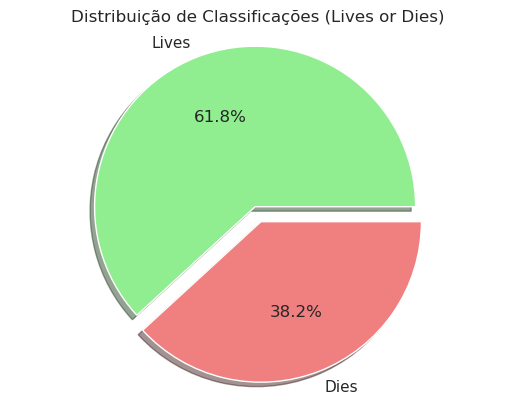

In [434]:
count_lives = (df['Class'] == 'Lives').sum()
count_dies = (df['Class'] == 'Dies').sum()

percentagem_lives = (count_lives / df.shape[0]) * 100
percentagem_dies = (count_dies / df.shape[0]) * 100

labels = ['Lives', 'Dies']
sizes = [percentagem_lives, percentagem_dies]
colors = ['lightgreen', 'lightcoral']
explode = (0.1, 0)

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True)
plt.title('Distribuição de Classificações (Lives or Dies)')
plt.axis('equal')
plt.show()

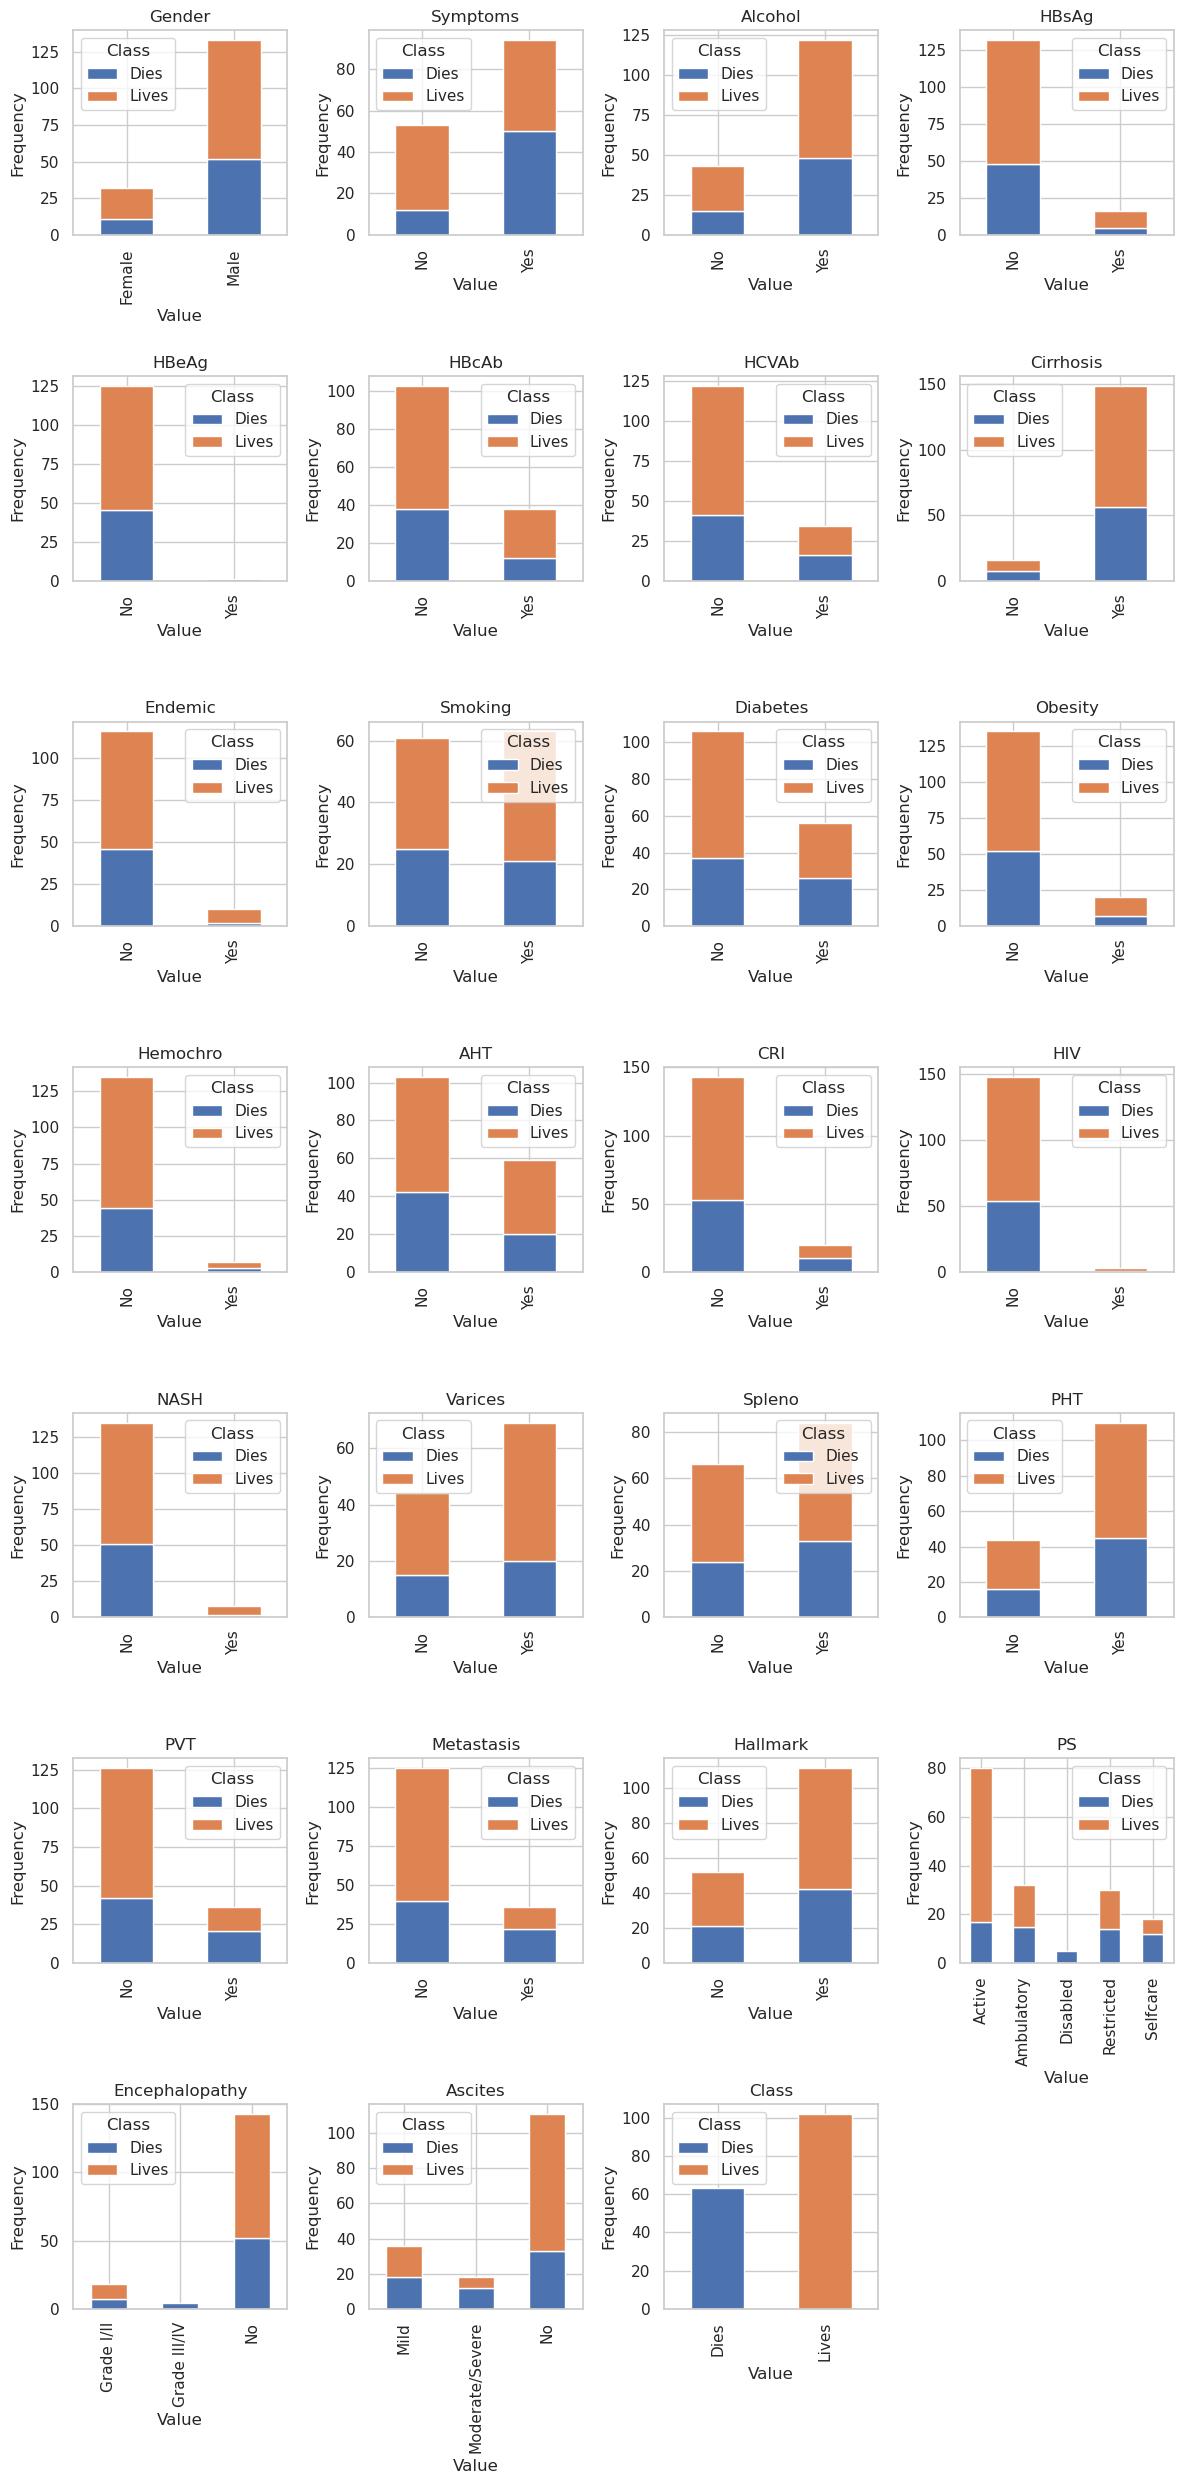

In [435]:
categorical_cols = df.select_dtypes(exclude=['number']).columns
fig, axes = plt.subplots(len(categorical_cols) // 4 + 1, 4, figsize=(12, 25))
axes = axes.flatten()

for i, column in enumerate(categorical_cols):
    df.groupby([column, 'Class']).size().unstack().plot(kind='bar', stacked=True, ax=axes[i])
    axes[i].set_title(column)
    axes[i].set_xlabel('Value')
    axes[i].set_ylabel('Frequency')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

<div style="text-align: justify">
Conducting an analysis of discrete binary features in relation to the target class is also important. This analysis enables the extraction of valuable information such as correlations and distributions of each feature value with respect to the target class. By examining how these binary features relate to the target, we gain insights into their predictive power and significance in the context of the classification task.
</div> 

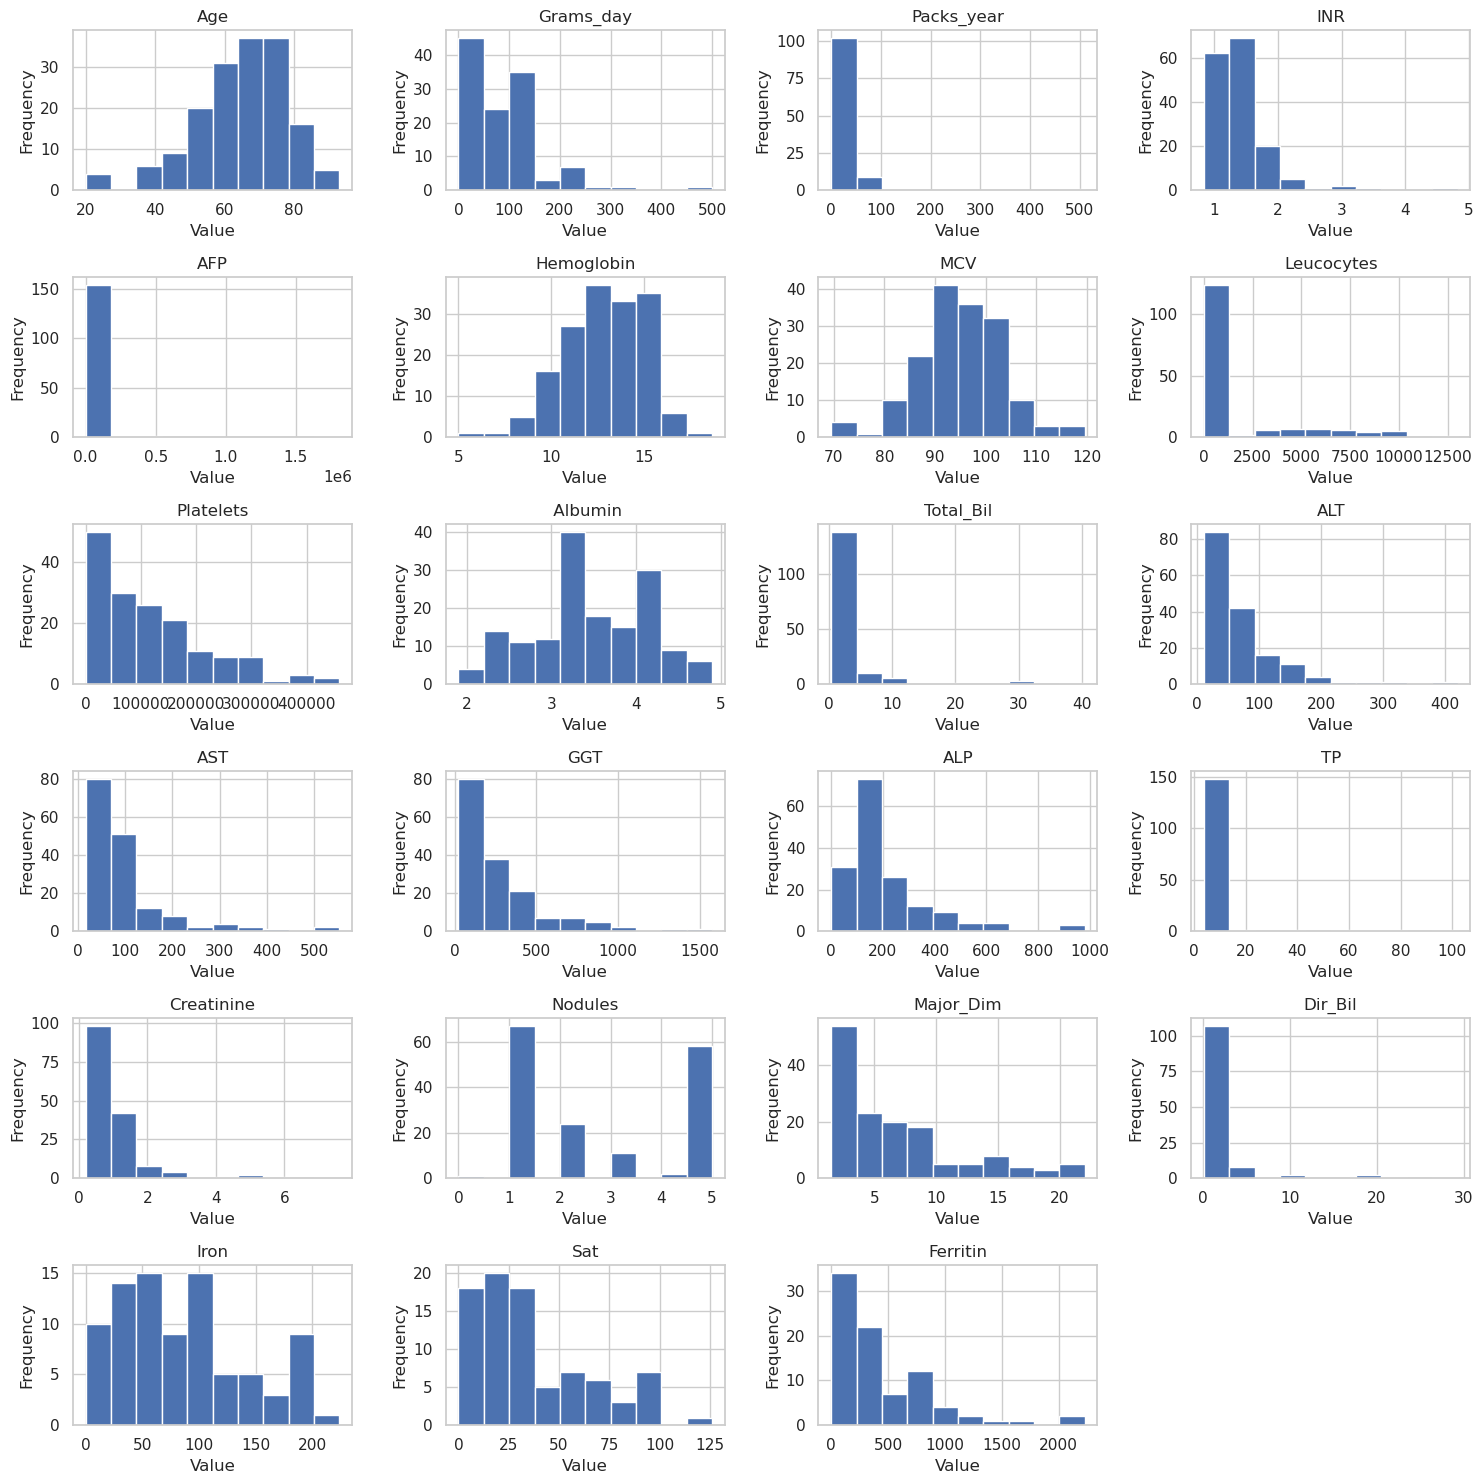

In [436]:
fig, axes = plt.subplots(len(numeric_cols) // 4 + 1, 4, figsize=(15, 15))
axes = axes.flatten()

for i, col in enumerate(numeric_cols):
    ax = axes[i]
    df[col].hist(ax=ax)
    ax.set_title(col)
    ax.set_xlabel('Value')
    ax.set_ylabel('Frequency')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()


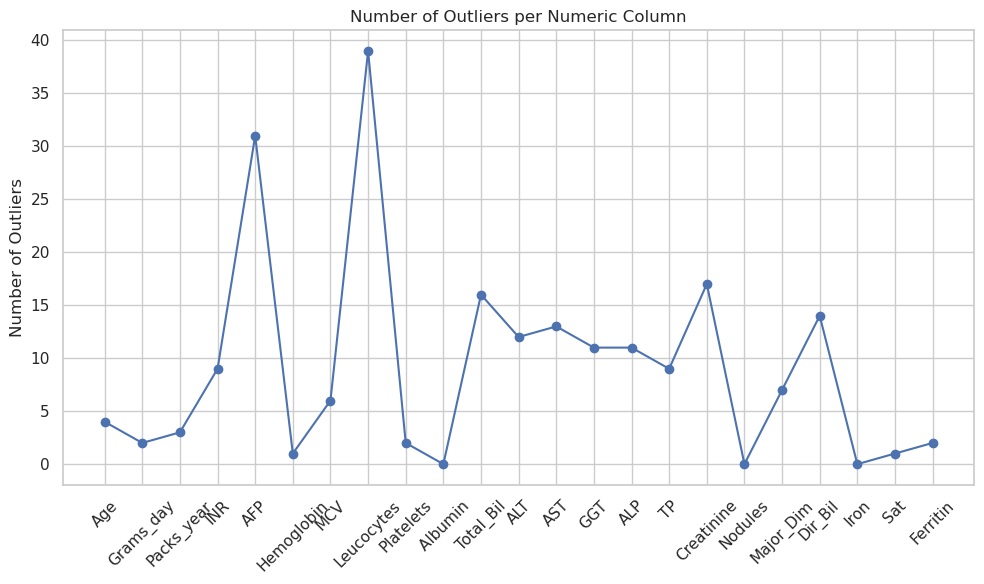

In [437]:
outlier_counts = {}  

for column in numeric_cols:
  Q1 = df[column].describe()['25%']
  Q3 = df[column].describe()['75%']
  IQR = Q3 - Q1

  # Define the lower and upper bounds for outliers
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR

  column_outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
  outlier_counts[column] = len(column_outliers)  # Count outliers

plt.figure(figsize=(10, 6))  # Adjust figure size as needed
plt.plot(outlier_counts.keys(), outlier_counts.values(), marker='o', linestyle='-')
plt.ylabel("Number of Outliers")
plt.grid(True)
plt.title("Number of Outliers per Numeric Column")
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

<div style="text-align: justify">
Conducting an analysis of continuous features is important to extract information such as distributions of each feature value, how many outliers and get the idea of the values to truncate outliers.
</div> 

<div style="text-align: justify">
It is crucial to visualize the correlations between each feature and between features and the target class. These visualizations provide valuable insights, such as identifying highly correlated columns with the target class, like 'Symptoms'. Additionally, we might observe that examination values exhibit minimal correlation with the target class individually. However, it's important to note that dropping these features might not be appropriate since they are highly related to each other. In medical contexts, the combination of information from various features is vital for comprehensive analysis and diagnosis, underscoring the importance of retaining them despite their low individual correlations with the target class.
</div> 

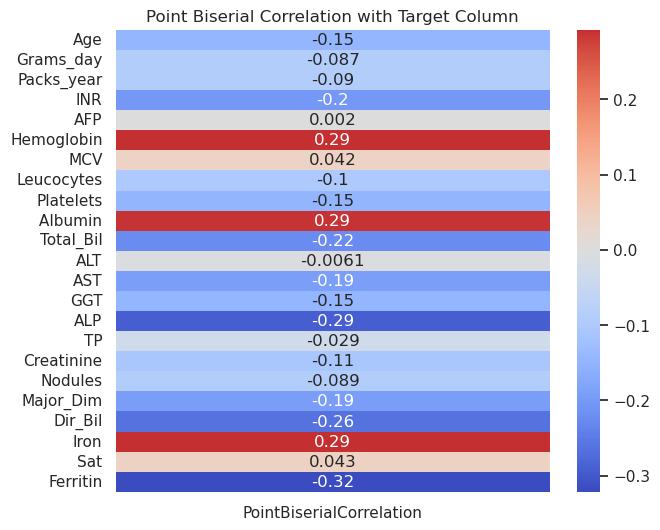

In [438]:
from scipy.stats import pointbiserialr

df_temp = df[numeric_cols + ['Class']].copy()
df_temp['Class'] = df_temp['Class'].map({'Lives': 1, 'Dies': 0})

correlations = {}

for col in numeric_cols:
    mask = df_temp[col].notna()
    corr, p_value = pointbiserialr(df_temp.loc[mask, col], df_temp.loc[mask, 'Class'])
    correlations[col] = corr

correlation_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['PointBiserialCorrelation'])

plt.figure(figsize=(7, 6))
sns.heatmap(correlation_df, annot=True, cmap='coolwarm', center=0)
plt.title('Point Biserial Correlation with Target Column')
plt.show()

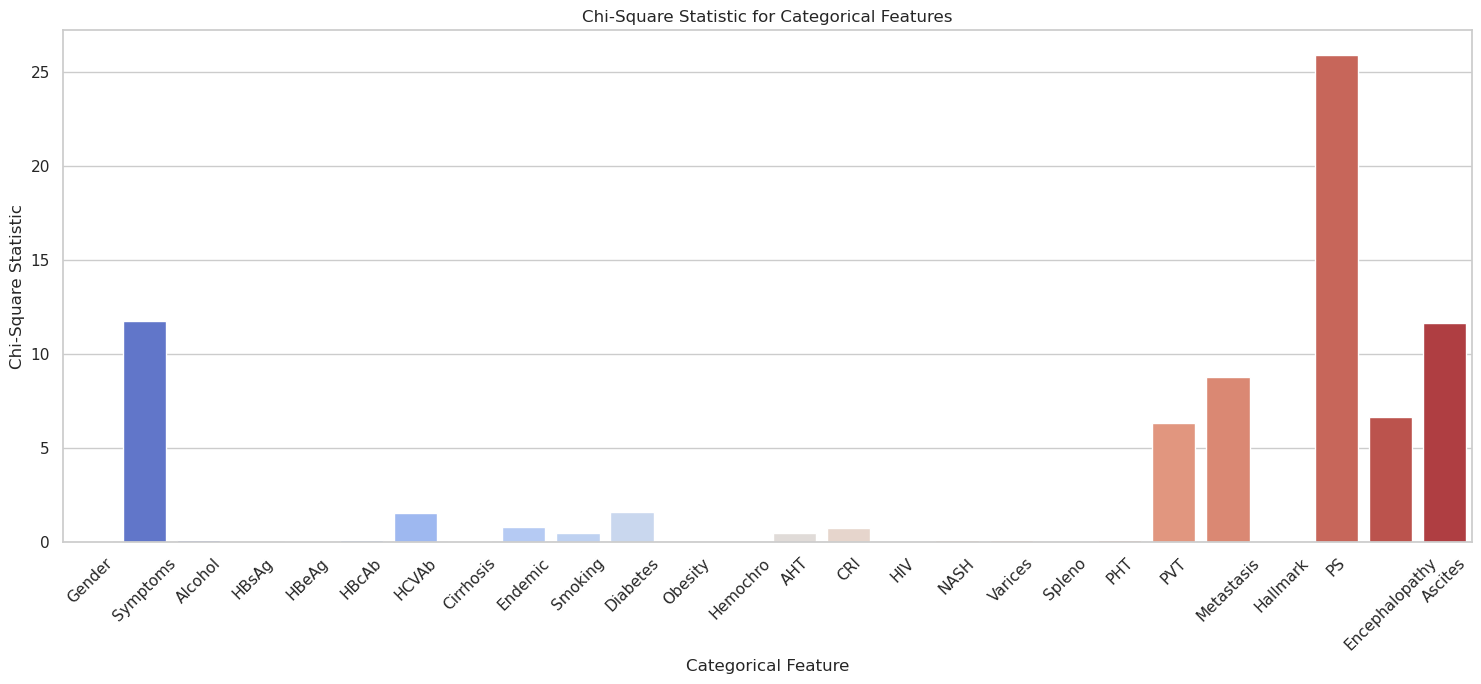

In [439]:
from scipy.stats import chi2_contingency

correlations = {}
for col in categorical_cols[:-1]:
    contingency_table = pd.crosstab(df[col], df['Class'])
    chi2, p, dof, expected = chi2_contingency(contingency_table)
    correlations[col] = chi2

chi2_df = pd.DataFrame.from_dict(correlations, orient='index', columns=['Chi-Square Statistic'])

plt.figure(figsize=(15, 7))
sns.barplot(x=chi2_df.index, y='Chi-Square Statistic', data=chi2_df, palette='coolwarm')
plt.title('Chi-Square Statistic for Categorical Features')
plt.xlabel('Categorical Feature')
plt.ylabel('Chi-Square Statistic')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

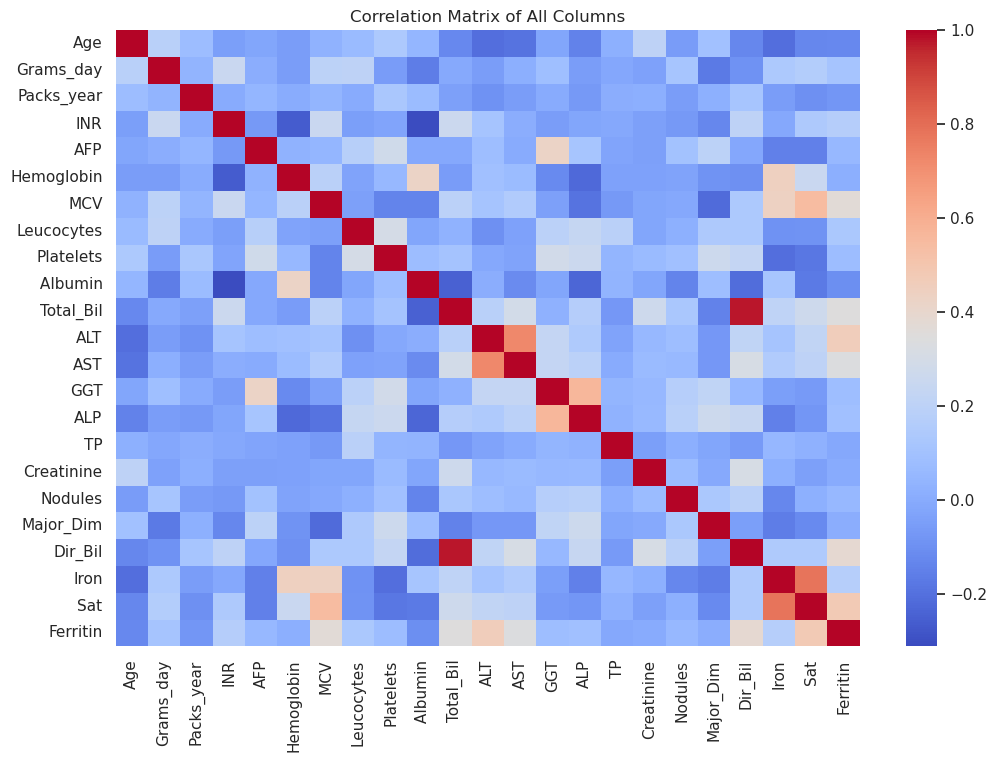

In [392]:
df_temp = df[numeric_cols]
correlation_matrix = df_temp.corr()
class_corr = correlation_matrix

plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of All Columns')
plt.show()

### **1.3 Conclusions**:  

<div style="text-align: justify">
Solely examining the correlation between individual columns and the target variable may provide an incomplete analysis of the dataset. Due to the high correlation among many columns, the predictive significance of a particular column for the target class may be contingent on its interactions with other variables. Consequently, a column that exhibits low correlation in isolation may demonstrate high relevance when analyzed alongside other columns.  Additionally, the continuous values display a notable presence of outliers. It may be reasonable to handle these outliers by either truncating or removing them from the dataset.  Moreover, certain columns are very imbalanced, such as 'HBeAG' and 'HIV', making them strong candidates for being removed from the dataset.
</div> 

# 2. Data Pre-processing

<div style="text-align: justify">
With the insights gained during the Data Exploration phase, we can tailor our data processing methods accordingly.
</div> 

In [393]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer

encoder = LabelEncoder()
imputer = KNNImputer(n_neighbors=5)

<div style="text-align: justify">
Replacing missing values of discrete binary columns by the mode value of each column.
</div> 

In [394]:
for column in categorical_cols:
    df[column] = df[column].fillna(df[column].mode()[0])
    df[column] = encoder.fit_transform(df[column])
    
df.head(5)


,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,Diabetes,Obesity,Hemochro,AHT,CRI,HIV,NASH,Varices,Spleno,PHT,PVT,Metastasis,Hallmark,Age,Grams_day,Packs_year,PS,Encephalopathy,Ascites,INR,AFP,Hemoglobin,MCV,Leucocytes,Platelets,Albumin,Total_Bil,ALT,AST,GGT,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,1,0,1,0,0,0,0,1,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,67,137.0,15.0,0,2,2,1.53,95.0,13.7,106.6,4.9,99.0,3.4,2.1,34.0,41.0,183.0,150.0,7.1,0.70,1.0,3.5,0.5,NaN,NaN,NaN,1
1,0,1,0,0,0,0,1,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,62,0.0,NaN,0,2,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,1.8,NaN,NaN,NaN,NaN,1
2,1,0,1,1,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0,1,1,78,50.0,50.0,1,2,0,0.96,5.8,8.9,79.8,8.4,472.0,3.3,0.4,58.0,68.0,202.0,109.0,7.0,2.10,5.0,13.0,0.1,28.0,6.0,16.0,1
3,1,1,1,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1,1,77,40.0,30.0,0,2,2,0.95,2440.0,13.4,97.1,9.0,279.0,3.7,0.4,16.0,64.0,94.0,174.0,8.1,1.11,2.0,15.7,0.2,NaN,NaN,NaN,0
4,1,1,1,1,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,76,100.0,30.0,0,2,2,0.94,49.0,14.3,95.1,6.4,199.0,4.1,0.7,147.0,306.0,173.0,109.0,6.9,1.80,1.0,9.0,NaN,59.0,15.0,22.0,1


<div style="text-align: justify">
To replace missing values in continuous columns, we will use the KNN-Imputer, which selects the k nearest values 
and computes the mean of each column.
</div> 

In [395]:
df_imputed_continuous = imputer.fit_transform(df[numeric_cols[1:]]) # Removing Age
df_imputed_continuous = pd.DataFrame(df_imputed_continuous, columns=numeric_cols[1:])
df[numeric_cols[1:]] = df_imputed_continuous

df.head(5)

,Gender,Symptoms,Alcohol,HBsAg,HBeAg,HBcAb,HCVAb,Cirrhosis,Endemic,Smoking,Diabetes,Obesity,Hemochro,AHT,CRI,HIV,NASH,Varices,Spleno,PHT,PVT,Metastasis,Hallmark,Age,Grams_day,Packs_year,PS,Encephalopathy,Ascites,INR,AFP,Hemoglobin,MCV,Leucocytes,Platelets,Albumin,Total_Bil,ALT,AST,GGT,ALP,TP,Creatinine,Nodules,Major_Dim,Dir_Bil,Iron,Sat,Ferritin,Class
0,1,0,1,0,0,0,0,1,0,1,1,0,1,0,0,0,0,1,0,0,0,0,1,67,137.0,15.0,0,2,2,1.5300,95.00,13.70,106.6,4.90,99.0,3.4,2.10,34.0,41.0,183.0,150.0,7.10,0.700,1.0,3.5,0.500,126.8,61.4,416.58,1
1,0,1,0,0,0,0,1,1,0,1,1,0,0,1,0,0,0,1,0,0,0,0,1,62,0.0,26.0,0,2,2,1.3936,1627.28,12.78,94.0,6.74,19680.2,3.5,2.32,47.6,57.0,308.8,209.6,6.62,1.142,1.0,1.8,1.000,125.0,47.8,789.60,1
2,1,0,1,1,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,1,0,1,1,78,50.0,50.0,1,2,0,0.9600,5.80,8.90,79.8,8.40,472.0,3.3,0.40,58.0,68.0,202.0,109.0,7.00,2.100,5.0,13.0,0.100,28.0,6.0,16.00,1
3,1,1,1,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0,0,1,1,77,40.0,30.0,0,2,2,0.9500,2440.00,13.40,97.1,9.00,279.0,3.7,0.40,16.0,64.0,94.0,174.0,8.10,1.110,2.0,15.7,0.200,51.2,19.0,278.40,0
4,1,1,1,1,0,1,0,1,0,1,0,0,0,1,1,0,0,0,0,0,0,0,1,76,100.0,30.0,0,2,2,0.9400,49.00,14.30,95.1,6.40,199.0,4.1,0.70,147.0,306.0,173.0,109.0,6.90,1.800,1.0,9.0,0.514,59.0,15.0,22.00,1


In [396]:
# colums_to_drop = ['HBeAg','HIV']
colums_to_drop = ['Gender','Alcohol', 'HBcAb', 'HCVAb', 'Endemic', 'Smoking', 'Diabetes', 'AHT', 'CRI',  'Varices',  'PHT', 'PVT', 'Metastasis',
                 'Sat', 'Ferritin', 'Iron', 'Nodules','TP','ALT','MCV','AFP']
df=df.drop(columns=colums_to_drop)
# "Iron","Sat","Ferritin"
# df.columns

# Data Modelling and Data Analysis

In [397]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, cross_validate, cross_val_score, learning_curve
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, accuracy_score, roc_auc_score, auc
from sklearn.tree import plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

<div style="text-align: justify">
To analyze and select the model that best fits our situation, we evaluated various hyperparameters and metric values. For Decision Trees, we utilized accuracy, precision, recall, and F1 score as our metrics. Since accuracy alone may not be reliable due to slight imbalances in the dataset, we considered multiple metrics. We experimented with different criteria, depths, minimum sample splits, and minimum sample leaf sizes.
</div> 

In [398]:
train = df.iloc[:,:-1]
test = df.iloc[:, -1]

In [399]:
scoring = ['accuracy', 'precision', 'recall', 'f1']
dt_params = {
    'criterion': ['gini', 'entropy'],  
    'max_depth': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15],  
    'min_samples_split': [2, 5, 10],  
    'min_samples_leaf': [1, 2, 4]  
}

dt = DecisionTreeClassifier()

grid_search = GridSearchCV(dt, dt_params, cv=5, scoring=scoring, refit=False)
grid_search.fit(train, test)

results_tree = pd.DataFrame(grid_search.cv_results_)
relevant_columns = ['param_criterion', 'param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf', 'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1']
results_tree = results_tree[relevant_columns]

results_tree = results_tree.rename(columns={
    'param_criterion': 'Criterion',
    'param_max_depth': 'Max Depth',
    'param_min_samples_split': 'Min Samples Split',
    'param_min_samples_leaf': 'Min Samples Leaf',
    'mean_test_accuracy': 'Accuracy',
    'mean_test_precision': 'Precision',
    'mean_test_recall': 'Recall',
    'mean_test_f1': 'F1 Score'
})

print("Best accuracy:", results_tree['Accuracy'].max(), "(Index:", results_tree['Accuracy'].idxmax(), ")")
print("Best precision:", results_tree['Precision'].max(), "(Index:", results_tree['Precision'].idxmax(), ")")
print("Best recall:", results_tree['Recall'].max(), "(Index:", results_tree['Recall'].idxmax(), ")")
print("Best F1 Score:", results_tree['F1 Score'].max(), "(Index:", results_tree['F1 Score'].idxmax(), ")")

print("\nLine with the Best Recall:")
best_tree_params = results_tree.iloc[results_tree['Recall'].idxmax()]
print(best_tree_params)

Best accuracy: 0.6848484848484848 (Index: 117 )
Best precision: 0.7727866904337493 (Index: 117 )
Best recall: 0.7352380952380952 (Index: 71 )
Best F1 Score: 0.727092210115466 (Index: 26 )

Line with the Best Recall:
Criterion                gini
Max Depth                  12
Min Samples Split          10
Min Samples Leaf            4
Accuracy             0.660606
Precision            0.719127
Recall               0.735238
F1 Score             0.724807
Name: 71, dtype: object


In [400]:
knn_params = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15, 17, 19],  
    'weights': ['uniform', 'distance'],  
    'p': [1, 2]  # Power parameter for the Minkowski metric (1 for Manhattan distance, 2 for Euclidean distance)
}

knn = KNeighborsClassifier()

grid_search = GridSearchCV(knn, knn_params, cv=5, scoring=scoring, refit=False)
grid_search.fit(train, test)
results_knn = pd.DataFrame(grid_search.cv_results_)

relevant_columns_knn = ['param_n_neighbors', 'param_weights', 'param_p', 'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1']
results_knn = results_knn[relevant_columns_knn]

results_knn = results_knn.rename(columns={
    'param_n_neighbors': 'Number of Neighbors',
    'param_weights': 'Weights',
    'param_p': 'P',
    'mean_test_accuracy': 'Accuracy',
    'mean_test_precision': 'Precision',
    'mean_test_recall': 'Recall',
    'mean_test_f1': 'F1 Score'
})

print("Best accuracy:", results_knn['Accuracy'].max(), "(Index:", results_knn['Accuracy'].idxmax(), ")")
print("Best precision:", results_knn['Precision'].max(), "(Index:", results_knn['Precision'].idxmax(), ")")
print("Best recall:", results_knn['Recall'].max(), "(Index:", results_knn['Recall'].idxmax(), ")")
print("Best F1 Score:", results_knn['F1 Score'].max(), "(Index:", results_knn['F1 Score'].idxmax(), ")")

print("\nLine with the Best Recall:")
best_knn_params = results_knn.iloc[results_knn['Recall'].idxmax()]
print(best_knn_params)
print("\n\n")

Best accuracy: 0.6848484848484848 (Index: 24 )
Best precision: 0.6974159544159544 (Index: 24 )
Best recall: 0.8819047619047617 (Index: 28 )
Best F1 Score: 0.7743419392818097 (Index: 24 )

Line with the Best Recall:
Number of Neighbors          17
Weights                 uniform
P                             1
Accuracy               0.666667
Precision              0.677731
Recall                 0.881905
F1 Score                0.76542
Name: 28, dtype: object





In [401]:
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt']
}

rf = RandomForestClassifier(random_state=42)

grid_search = GridSearchCV(estimator=rf, param_grid=param_grid, cv=5, scoring=scoring, refit=False, n_jobs=-1)
grid_search.fit(train, test)
results_forest = pd.DataFrame(grid_search.cv_results_)


relevant_columns_forest = ['param_n_estimators', 'param_max_depth', 'param_min_samples_split', 'param_min_samples_leaf', 'param_max_features', 'mean_test_accuracy', 'mean_test_precision', 'mean_test_recall', 'mean_test_f1']
results_forest = results_forest[relevant_columns_forest]


results_forest = results_forest.rename(columns={
    'param_n_estimators': 'Number of Estimators',
    'param_max_depth': 'Max Depht',
    'param_min_samples_split': 'Min Samples Split',
    'param_min_samples_leaf': 'Min Samples Leaf',
    'param_max_features': 'Max Featur',
    'mean_test_accuracy': 'Accuracy',
    'mean_test_precision': 'Precision',
    'mean_test_recall': 'Recall',
    'mean_test_f1': 'F1 Score'
})


print("Best accuracy:", results_forest['Accuracy'].max(), "(Index:", results_forest['Accuracy'].idxmax(), ")")
print("Best precision:", results_forest['Precision'].max(), "(Index:", results_forest['Precision'].idxmax(), ")")
print("Best recall:", results_forest['Recall'].max(), "(Index:", results_forest['Recall'].idxmax(), ")")
print("Best F1 Score:", results_forest['F1 Score'].max(), "(Index:", results_forest['F1 Score'].idxmax(), ")")

print("\nLine with the Best Recall:")
best_forest_params = results_forest.iloc[results_forest['Recall'].idxmax()]
print(best_forest_params)

Best accuracy: 0.7515151515151516 (Index: 42 )
Best precision: 0.7782862674850505 (Index: 42 )
Best recall: 0.891904761904762 (Index: 43 )
Best F1 Score: 0.8075071399428804 (Index: 34 )

Line with the Best Recall:
Number of Estimators         100
Max Depht                   None
Min Samples Split             10
Min Samples Leaf               2
Max Featur                  sqrt
Accuracy                0.733333
Precision               0.737683
Recall                  0.891905
F1 Score                0.804903
Name: 43, dtype: object


<div style="text-align: justify">
To analyze and select the model that best fits our situation, we evaluated various hyperparameters and metric values. For KNN, we utilized accuracy, precision, recall, and F1 score as our metrics. Since accuracy alone may not be reliable due to slight imbalances in the dataset, we considered multiple metrics. We experimented with different n_neighbors, weights and herustics.
</div>

Our objective is to predict whether a person will die within a year, and we are dealing with a slightly imbalanced dataset. So we have prioritized Recall as our most valuable metric because it's preferable to have false positives rather than false negatives.

Analysis of the best results on each metric, and the mean of the metrics for the KNN.

In [402]:
best_dt = DecisionTreeClassifier(criterion=best_tree_params['Criterion'], 
                                max_depth=best_tree_params['Max Depth'], 
                                min_samples_split=best_tree_params['Min Samples Split'],
                                min_samples_leaf=best_tree_params['Min Samples Leaf'])

best_knn = KNeighborsClassifier(n_neighbors=best_knn_params['Number of Neighbors'], 
                                weights=best_knn_params['Weights'], 
                                p=best_knn_params['P'])

best_rf = RandomForestClassifier(n_estimators=best_forest_params['Number of Estimators'],
                                max_depth=best_forest_params['Max Depht'],
                                min_samples_split=best_forest_params['Min Samples Split'],
                                min_samples_leaf=best_forest_params['Min Samples Leaf'],
                                max_features=best_forest_params['Max Featur'],
                                random_state=42)

print("Best parameters of Decision Tree:\n",end='')
print(best_tree_params)
print("\nBest parameters of KNN:\n", end='')
print(best_knn_params)
print("\nBest parameters of Random Forest:\n", end='')
print(best_forest_params)

Best parameters of Decision Tree:
Criterion                gini
Max Depth                  12
Min Samples Split          10
Min Samples Leaf            4
Accuracy             0.660606
Precision            0.719127
Recall               0.735238
F1 Score             0.724807
Name: 71, dtype: object

Best parameters of KNN:
Number of Neighbors          17
Weights                 uniform
P                             1
Accuracy               0.666667
Precision              0.677731
Recall                 0.881905
F1 Score                0.76542
Name: 28, dtype: object

Best parameters of Random Forest:
Number of Estimators         100
Max Depht                   None
Min Samples Split             10
Min Samples Leaf               2
Max Featur                  sqrt
Accuracy                0.733333
Precision               0.737683
Recall                  0.891905
F1 Score                0.804903
Name: 43, dtype: object


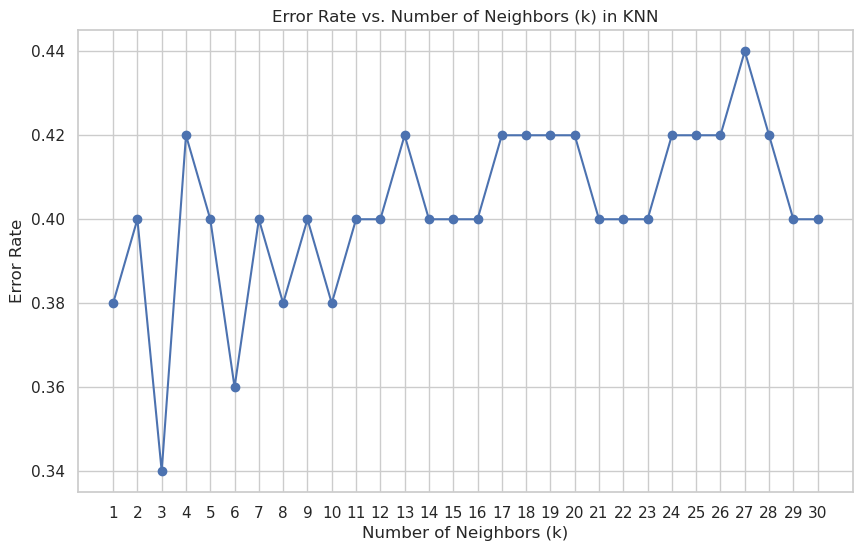

In [411]:
k_values = list(range(1, 31))

error_rates = []
X_train, X_test, y_train, y_test = train_test_split(train, test, test_size=0.3, random_state=42)

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k, weights=best_knn_params['Weights'], p=best_knn_params['P'])
    knn.fit(X_train, y_train)
    error_rate = 1.0 - knn.score(X_test, y_test)
    error_rates.append(error_rate)

plt.figure(figsize=(10, 6))
plt.plot(k_values, error_rates, marker='o', linestyle='-')
plt.title('Error Rate vs. Number of Neighbors (k) in KNN')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Error Rate')
plt.grid(True)
plt.xticks(k_values)
plt.show()

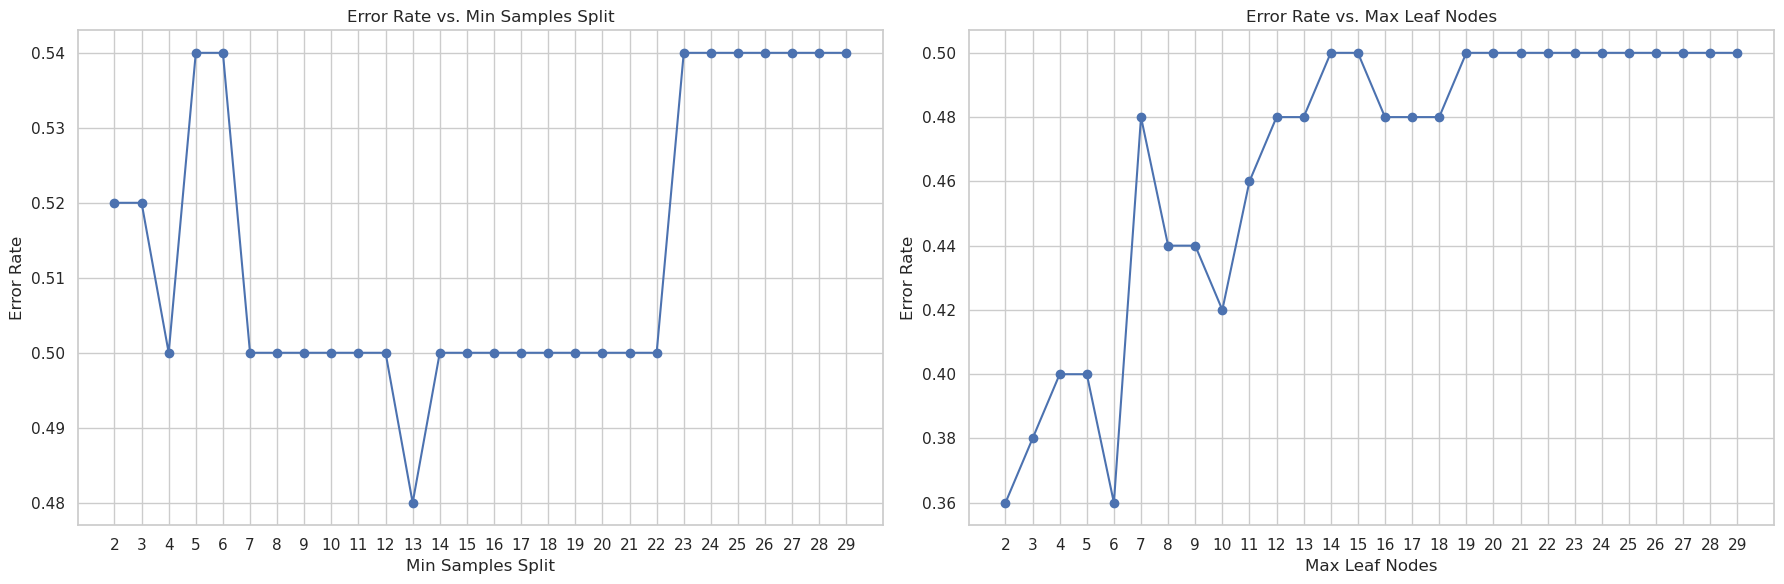

In [412]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split


min_samples_split_values = list(range(2, 30))
error_rates_min_samples_split = []

for min_samples_split in min_samples_split_values:
    dt = DecisionTreeClassifier(min_samples_split=min_samples_split, random_state=42)
    dt.fit(X_train, y_train)
    error_rate = 1.0 - dt.score(X_test, y_test)
    error_rates_min_samples_split.append(error_rate)

max_leaf_nodes_values = list(range(2, 30))
error_rates_max_leaf_nodes = []

for max_leaf_nodes in max_leaf_nodes_values:
    dt = DecisionTreeClassifier(max_leaf_nodes=max_leaf_nodes, random_state=42)
    dt.fit(X_train, y_train)
    error_rate = 1.0 - dt.score(X_test, y_test)
    error_rates_max_leaf_nodes.append(error_rate)

fig, axes = plt.subplots(1, 2, figsize=(18, 6))

axes[0].plot(min_samples_split_values, error_rates_min_samples_split, marker='o', linestyle='-')
axes[0].set_title('Error Rate vs. Min Samples Split')
axes[0].set_xlabel('Min Samples Split')
axes[0].set_ylabel('Error Rate')
axes[0].grid(True)
axes[0].set_xticks(min_samples_split_values)

axes[1].plot(max_leaf_nodes_values, error_rates_max_leaf_nodes, marker='o', linestyle='-')
axes[1].set_title('Error Rate vs. Max Leaf Nodes')
axes[1].set_xlabel('Max Leaf Nodes')
axes[1].set_ylabel('Error Rate')
axes[1].grid(True)
axes[1].set_xticks(max_leaf_nodes_values)

plt.tight_layout()
plt.show()

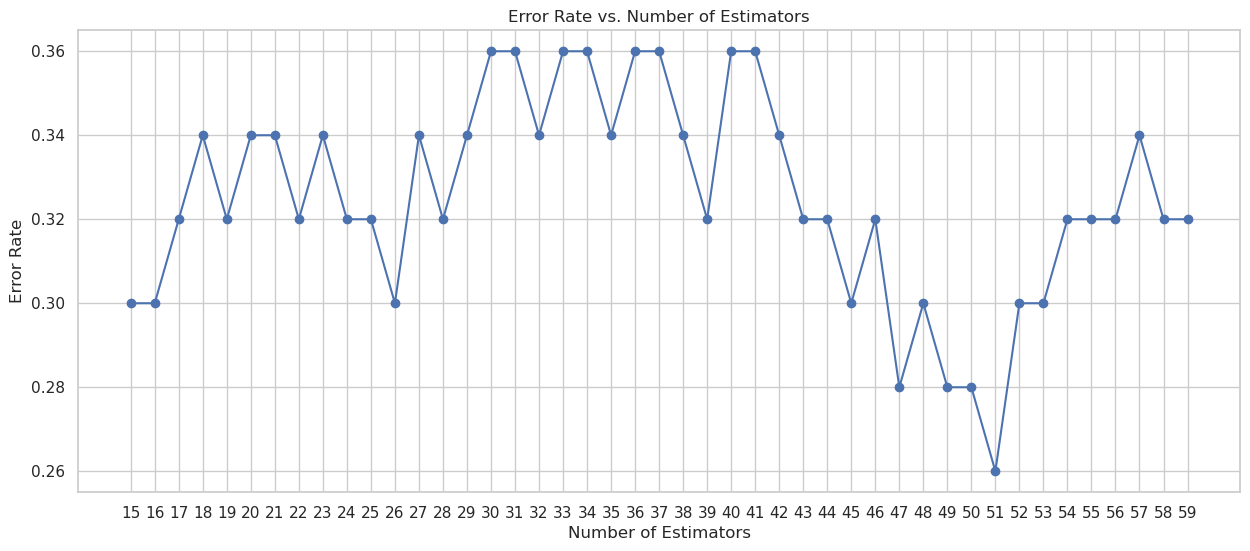

In [413]:
n_estimators_values = list(range(15, 60))

error_rates = []

for n_estimators in n_estimators_values:
    rf = RandomForestClassifier(n_estimators=n_estimators, random_state=42)
    rf.fit(X_train, y_train)
    error_rate = 1.0 - rf.score(X_test, y_test)
    error_rates.append(error_rate)

plt.figure(figsize=(15, 6))
plt.plot(n_estimators_values, error_rates, marker='o', linestyle='-')
plt.title('Error Rate vs. Number of Estimators')
plt.xlabel('Number of Estimators')
plt.ylabel('Error Rate')
plt.grid(True)
plt.xticks(n_estimators_values)
plt.show()

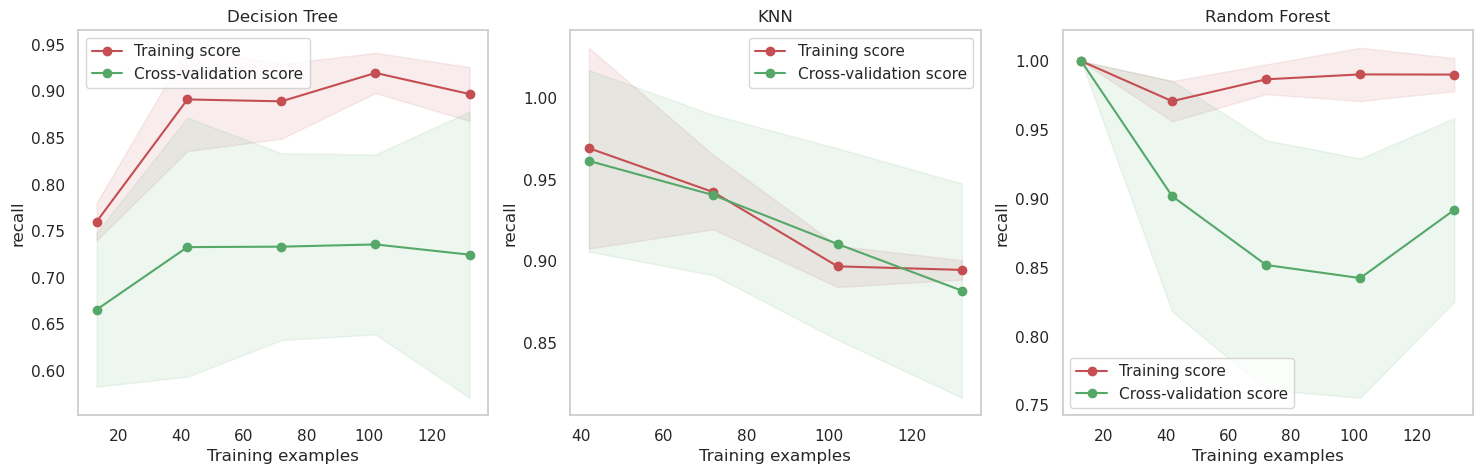

In [414]:
def plot_learning_curve(estimator, title, X, y, scoring_metric, 
                        ylim=None, cv=None, n_jobs=None, 
                        train_sizes=np.linspace(.1, 1.0, 5), 
                        xlim=None, ax=None):
    if ax is None:
        ax = plt.gca()
    ax.set_title(title)
    if ylim is not None:
        ax.set_ylim(*ylim)
    ax.set_xlabel("Training examples")
    ax.set_ylabel(f"{scoring_metric}")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes,  
        scoring=scoring_metric)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    ax.grid()
    ax.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    ax.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    ax.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    ax.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")
    ax.legend(loc="best")

    # Set x-axis limits if xlim is provided
    if xlim is not None:
        ax.set_xlim(xlim)

fig, axes = plt.subplots(1, 3, figsize=(18, 5))

plot_learning_curve(best_knn, "KNN", train, test, "recall", ax=axes[1])
plot_learning_curve(best_dt, "Decision Tree", train, test, "recall", ax=axes[0])
plot_learning_curve(best_rf, "Random Forest", train, test, "recall", ax=axes[2])

plt.show()

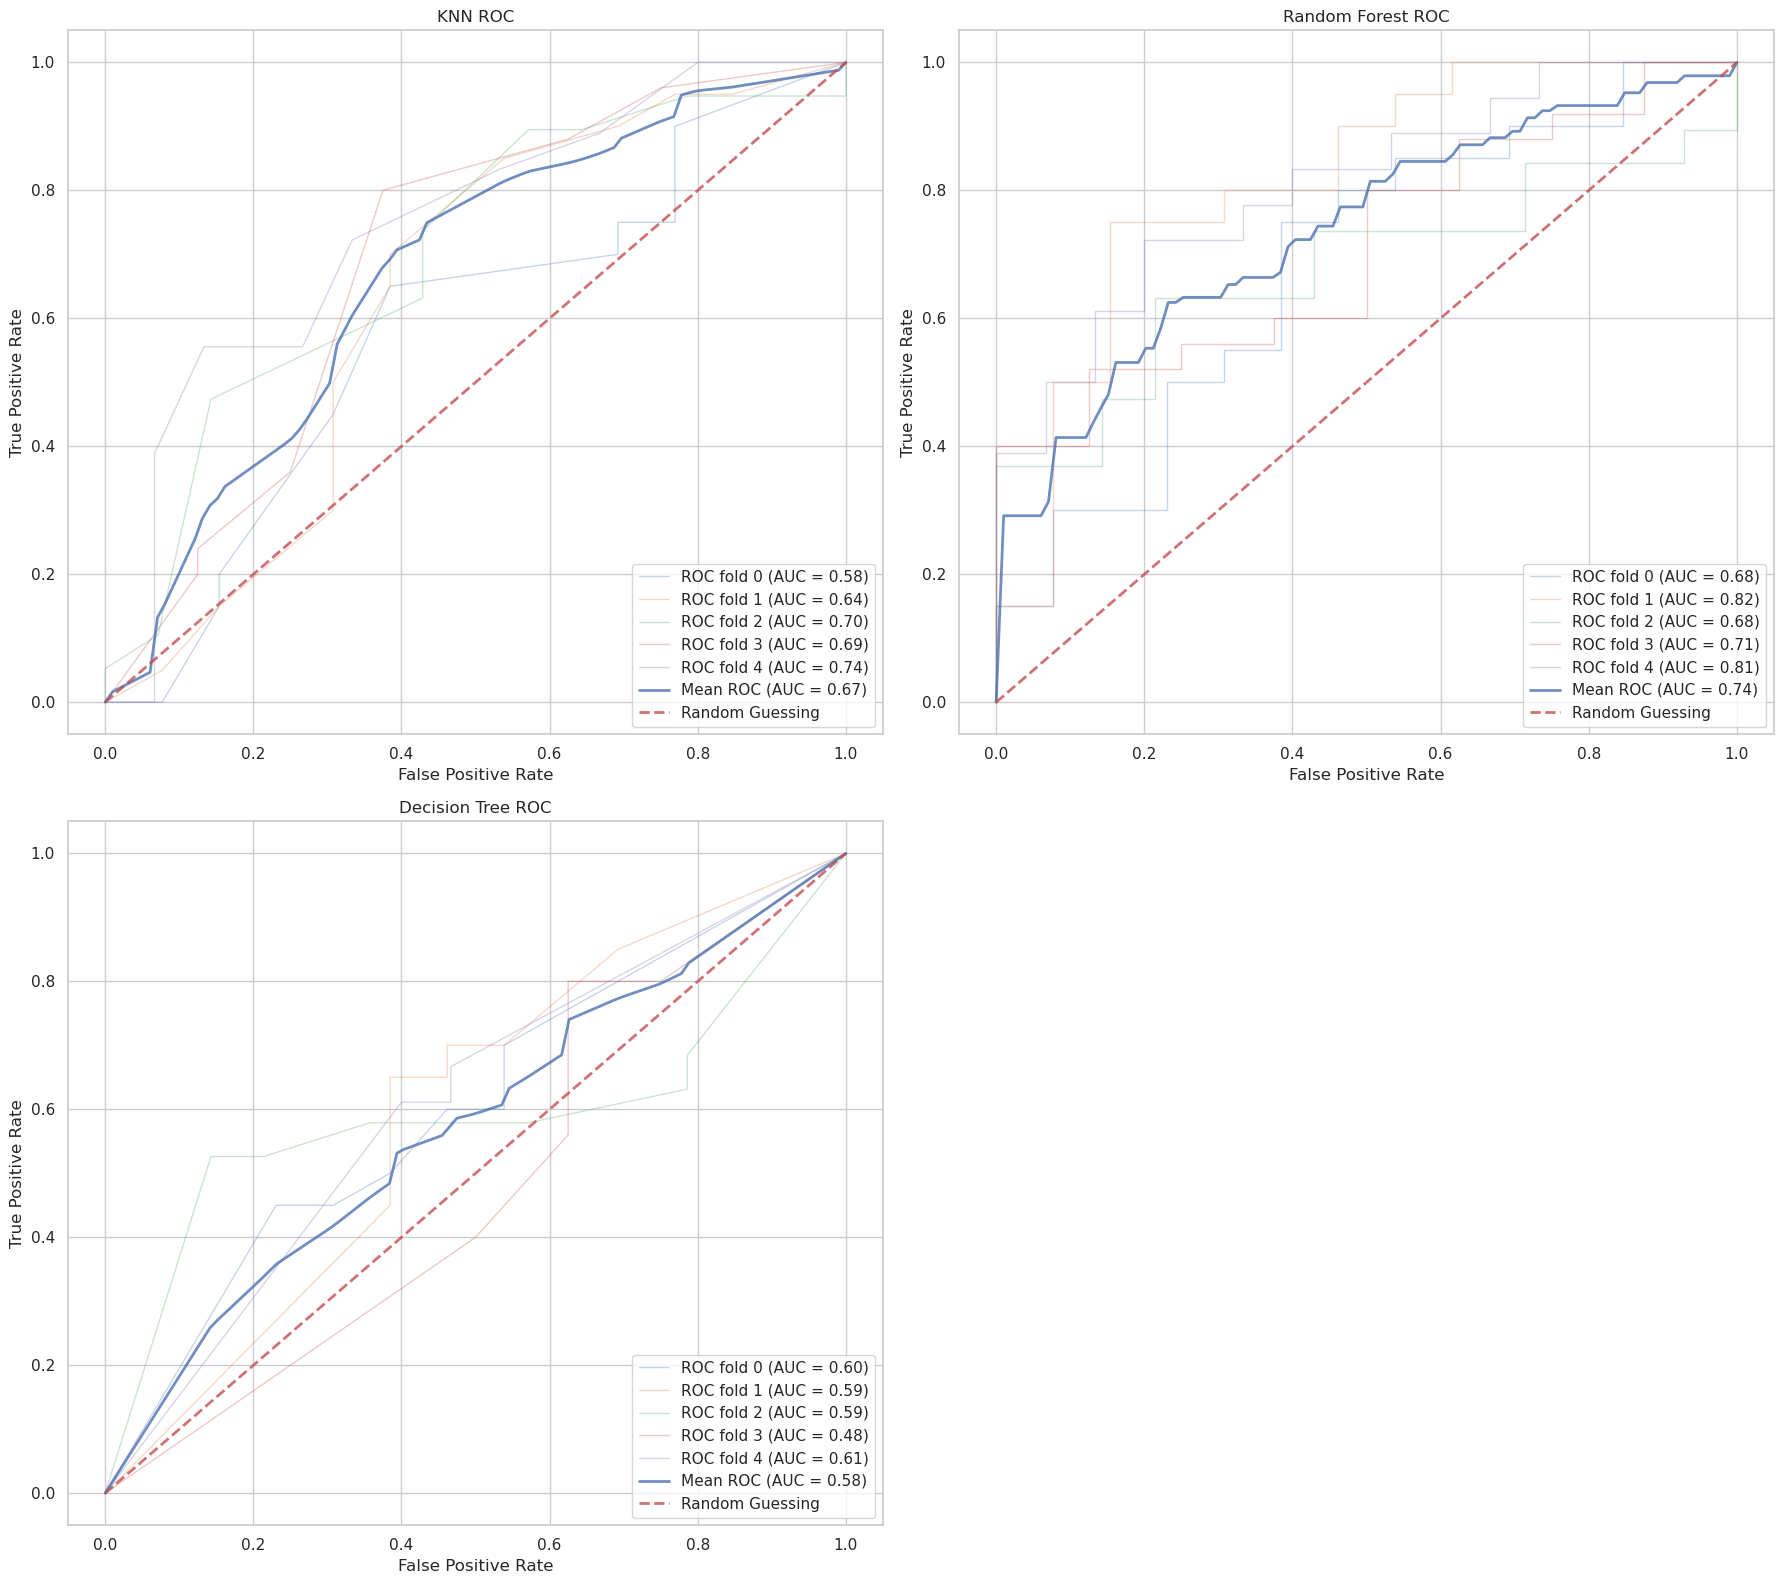

In [415]:
def plot_roc_auc(model, X, y, ax, kf=KFold(n_splits=5, shuffle=True, random_state=42)):
    tprs = []
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)
    
    for i, (train_index, test_index) in enumerate(kf.split(X)):
        if isinstance(X, pd.DataFrame):
            X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        else:
            X_train, X_test = X[train_index], X[test_index]  
        y_train, y_test = y[train_index], y[test_index]
        model.fit(X_train, y_train)
        y_score = model.predict_proba(X_test)
        
        fpr, tpr, _ = roc_curve(y_test.ravel(), y_score[:, 1])
        tprs.append(np.interp(mean_fpr, fpr, tpr))
        tprs[-1][0] = 0.0
        roc_auc = auc(fpr, tpr)
        aucs.append(roc_auc)
        ax.plot(fpr, tpr, lw=1, alpha=0.3,
                 label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    
    mean_tpr = np.mean(tprs, axis=0)
    mean_auc = auc(mean_fpr, mean_tpr)
    ax.plot(mean_fpr, mean_tpr, color='b',
             label=r'Mean ROC (AUC = %0.2f)' % mean_auc,
             lw=2, alpha=.8)
    
    ax.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r',
             label='Random Guessing', alpha=.8)
    
    ax.set_xlim([-0.05, 1.05])
    ax.set_ylim([-0.05, 1.05])
    ax.set_xlabel('False Positive Rate')
    ax.set_ylabel('True Positive Rate')
    ax.set_title('Receiver Operating Characteristic (ROC)')
    ax.legend(loc="lower right")

fig, axes = plt.subplots(2, 2, figsize=(18, 16))

# Hide the fourth (unused) subplot
fig.delaxes(axes[1, 1])

plot_roc_auc(best_knn, train.values, test.values, ax=axes[0, 0])
plot_roc_auc(best_rf, train.values, test.values, ax=axes[0, 1])
plot_roc_auc(best_dt, train.values, test.values, ax=axes[1, 0])

axes[0, 0].set_title('KNN ROC')
axes[0, 1].set_title('Random Forest ROC')
axes[1, 0].set_title('Decision Tree ROC')

plt.tight_layout()
plt.show()

In [416]:
X, y = df.iloc[:,:-1], df.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

best_dt = best_dt.fit(X_train, y_train)
best_knn = best_knn.fit(X_train, y_train)
best_rf = best_rf.fit(X_train, y_train)


y_pred_tree = best_dt.predict(X_test)
y_pred_knn = best_knn.predict(X_test)
y_pred_forest=best_rf.predict(X_test)

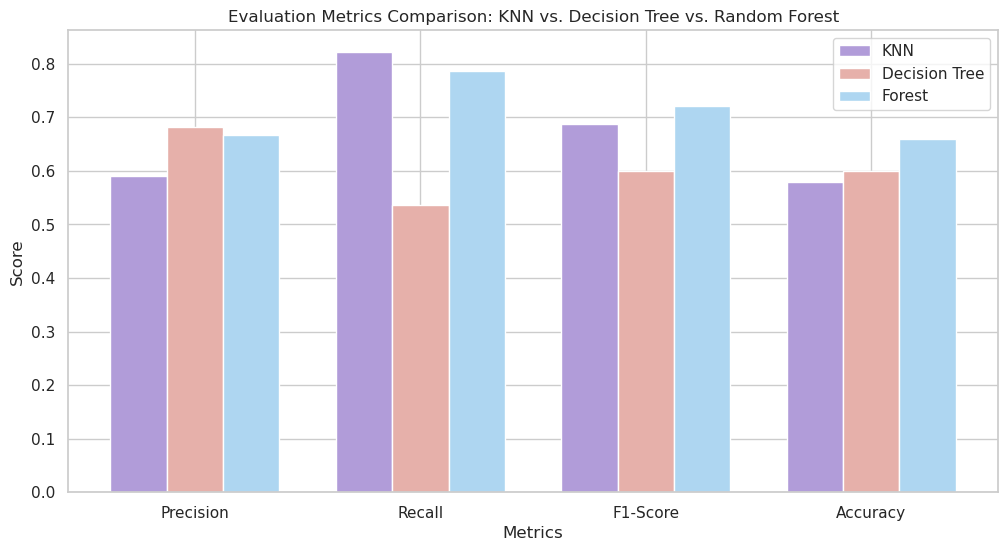

In [417]:
knn_precision = precision_score(y_test, y_pred_knn)
knn_recall = recall_score(y_test, y_pred_knn)
knn_f1 = f1_score(y_test, y_pred_knn)
knn_accuracy = accuracy_score(y_test, y_pred_knn)

tree_precision = precision_score(y_test, y_pred_tree)
tree_recall = recall_score(y_test, y_pred_tree)
tree_f1 = f1_score(y_test, y_pred_tree)
tree_accuracy = accuracy_score(y_test, y_pred_tree)

forest_precision = precision_score(y_test, y_pred_forest)
forest_recall = recall_score(y_test, y_pred_forest)
forest_f1 = f1_score(y_test, y_pred_forest)
forest_accuracy = accuracy_score(y_test, y_pred_forest)


mauve_color = '#B19CD9'
rose_color = '#E6B0AA'

sns.set(style="whitegrid")
plt.figure(figsize=(12, 6))

bar_width = 0.25
index = np.arange(4)

plt.bar(index, [knn_precision, knn_recall, knn_f1, knn_accuracy], bar_width, label='KNN', color=mauve_color)
plt.bar(index + bar_width, [tree_precision, tree_recall, tree_f1,tree_accuracy], bar_width, label='Decision Tree', color=rose_color)

xgb_color = '#AED6F1'  
plt.bar(index + 2 * bar_width, [forest_precision, forest_recall, forest_f1, forest_accuracy], bar_width, label='Forest', color=xgb_color)

plt.xlabel('Metrics')
plt.ylabel('Score')
plt.title('Evaluation Metrics Comparison: KNN vs. Decision Tree vs. Random Forest')
plt.xticks(index  + bar_width, ['Precision', 'Recall', 'F1-Score',"Accuracy"])
plt.legend()
plt.show()

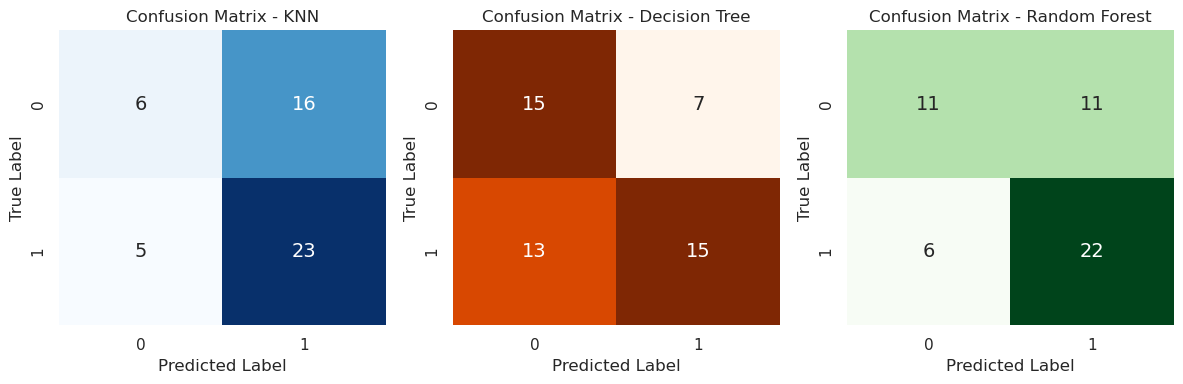

In [421]:
from sklearn.metrics import confusion_matrix

cm_knn = confusion_matrix(y_test, y_pred_knn)
cm_tree = confusion_matrix(y_test, y_pred_tree)
cm_forest = confusion_matrix(y_test, y_pred_forest)

plt.figure(figsize=(12, 4))

plt.subplot(1, 3, 1)
sns.heatmap(cm_knn, annot=True, fmt="d", cmap="Blues", cbar=False, annot_kws={"size": 14})
plt.title('Confusion Matrix - KNN')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.subplot(1, 3, 2)
sns.heatmap(cm_tree, annot=True, fmt="d", cmap="Oranges", cbar=False, annot_kws={"size": 14})
plt.title('Confusion Matrix - Decision Tree')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.subplot(1, 3, 3)
sns.heatmap(cm_forest, annot=True, fmt="d", cmap="Greens", cbar=False, annot_kws={"size": 14})
plt.title('Confusion Matrix - Random Forest')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')

plt.tight_layout()
plt.show()
